In [1]:
import sys
workPath = '/home/jovyan/workspace'
if not workPath in sys.path:
    sys.path.append(workPath)

import planetengine

planetengine.paths.delete_testdir()

system = planetengine.systems.arrhenius.build(
    planetengine.systems.isovisc.build(),
    Ra = 3e5,
    res = 16,
    f = 0.5
    )
initials = {
    'temperatureField': planetengine.initials.sinusoidal.build(
        planetengine.initials.sinusoidal.build(
            freq = 2,
            pert = 0.4
            )
        )
    }

model = planetengine.model.make_model(
    system,
    initials,
    outputPath = planetengine.paths.testPath
    )

model.iterate()

model.checkpoint()

model2 = planetengine.frame.load_frame(planetengine.paths.testPath, model.instanceID)

Making a new frame...
Building model...
Fitted 1 variables to the figure.
Initialising...
Initialisation complete!
Making a local archive...
Nothing to archive yet!
Frame built!
Iterating step 0 ...
Iteration complete!
Collecting...
No pre-existing directory for this model found. Making a new one...
Checkpointing...
Making checkpoint directory.
Saving figures...
Figures saved.
Saving vars of state...
Saving substrate to disk: mesh
Saving var to disk: temperatureField
Saved.
Saving snapshot...
Snapshot saved.
Saving datasets...
Datasets saved.
Checkpointed!
Clearing all data...
All data cleared!
Making a local archive...
Archiving...
Deleting model directory...
Model directory deleted.
Archived!
Making a backup...
Forking model to new directory...
Model forked to directory: /home/jovyan/workspace/out/test/backup
Backup saved.
/home/jovyan/workspace/out/test/pemod_calcinatory-oophoron
Tar found - unarchiving...
Unarchived.
Building model...
Fitted 1 variables to the figure.
Initialising.


Step: 0, modeltime: 0
Variable_varName=anon{}



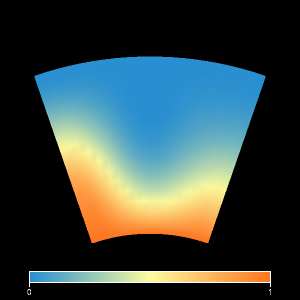

In [2]:
model2.report()

In [5]:
model2.system.locals.solve()

In [8]:
model2.figs[0]

In [9]:
{'temperatureField': {'inputs': ['f21e797de1d3c7162084a971a5f6b99f', 'outwardly-funfest'], 'all': ['543f670569abac010fcdd1f4fbaca4a0', 'spinule-semivowels'], 'scripts': ['3a117dbb4556b55b7b5f671aa8a649e9', 'afzalpur-unaccessibleness']}, 'all': ['4be6c39c3e83bef38ab0a5473197f829', 'calcinatory-oophoron'], 'system': {'inputs': ['dcae1490e5f3f8f247166845170a3043', 'beggable-souchongs'], 'all': ['e4706b7e0987e25abb3700585ed352f7', 'wayne-manikchari'], 'scripts': ['d4ecf1c92575e2e229681ad18522bbf5', 'boskier-nesselrode']}}

{'all': ['4be6c39c3e83bef38ab0a5473197f829', 'calcinatory-oophoron'],
 'system': {'all': ['e4706b7e0987e25abb3700585ed352f7', 'wayne-manikchari'],
  'inputs': ['dcae1490e5f3f8f247166845170a3043', 'beggable-souchongs'],
  'scripts': ['d4ecf1c92575e2e229681ad18522bbf5', 'boskier-nesselrode']},
 'temperatureField': {'all': ['543f670569abac010fcdd1f4fbaca4a0',
   'spinule-semivowels'],
  'inputs': ['f21e797de1d3c7162084a971a5f6b99f', 'outwardly-funfest'],
  'scripts': ['3a117dbb4556b55b7b5f671aa8a649e9',
   'afzalpur-unaccessibleness']}}